In [375]:
# import the libraries

#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')

#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas_profiling
import scipy.stats as stats

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics

#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Modules related to preprocessing (Imputation of missings, standardiszation, new features creation, converting categorical to numerical)
from sklearn.impute import MissingIndicator, SimpleImputer
#from sklearn.preprocessing import Imputer, PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder

#Modules related to feature selection
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2, SelectPercentile, f_classif, mutual_info_classif, f_regression, VarianceThreshold, SelectFromModel, mutual_info_classif, mutual_info_regression, SelectFpr, SelectFdr, SelectFwe


#Modules related to pipe line creation for faster processing
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
#from sklearn.features.transformers import DataFrameSelector

#Modules related to saving python objects permanantly
#from sklearn.externals import joblib

#Dumping model into current directory: joblib.dump(model_xg,"my_model.pkl") 
#Loading model: my_model_loaded=joblib.load("my_model.pkl")

#Modules related key techniques of supervised learning 
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa

from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor#, export_graphviz, export
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from xgboost import XGBClassifier, XGBRegressor
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
#from sklearn.neural_network import MLPClassifier, MLPRegressor

from sklearn.metrics import confusion_matrix

<Figure size 432x216 with 0 Axes>

In [376]:
from imblearn.over_sampling import SMOTE
from imblearn import under_sampling, over_sampling

# Importing the datasets of different Cyber attacks and merging them into a single dataframe.

In [377]:
pd.set_option('display.max_columns', None)

In [378]:
Attack_normal = pd.read_csv('Data_of_Attack_Back_Normal.csv')
Attack_normal['attack'] ='normal'
Attack_normal.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0.0,0.0,0.0,0.0,0.00215,0.45076,0,0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,normal
1,0.0,0.0,0.0,0.0,0.00162,0.04528,0,0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0,normal
2,0.0,0.0,0.0,0.0,0.00236,0.01228,0,0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.002,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0,normal
3,0.0,0.0,0.0,0.0,0.00233,0.02032,0,0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.003,0.003,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0,normal
4,0.0,0.0,0.0,0.0,0.00239,0.00486,0,0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.003,0.003,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.004,0.004,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0,normal
5,0.0,0.0,0.0,0.0,0.00238,0.01282,0,0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.004,0.004,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.005,0.005,0.1,0.0,0.020,0.0,0.0,0.0,0.0,0.0,normal
6,0.0,0.0,0.0,0.0,0.00235,0.01337,0,0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.005,0.005,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.006,0.006,0.1,0.0,0.017,0.0,0.0,0.0,0.0,0.0,normal
7,0.0,0.0,0.0,0.0,0.00234,0.01364,0,0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.006,0.006,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.007,0.007,0.1,0.0,0.014,0.0,0.0,0.0,0.0,0.0,normal
8,0.0,0.0,0.0,0.0,0.00239,0.01295,0,0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.007,0.007,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.008,0.008,0.1,0.0,0.012,0.0,0.0,0.0,0.0,0.0,normal
9,0.0,0.0,0.0,0.0,0.00181,0.05450,0,0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.008,0.008,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.009,0.009,0.1,0.0,0.011,0.0,0.0,0.0,0.0,0.0,normal


In [379]:
Attack_back = pd.read_csv('Data_of_Attack_Back.csv')
Attack_back['attack'] = 'back'
Attack_buffer_overflow = pd.read_csv('Data_of_Attack_Back_BufferOverflow.csv')
Attack_buffer_overflow['attack'] = 'buffer_overflow'

In [380]:
cols = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_error_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',' dst_host_serror_rate','dst_host_srv_serror_rate',' dst_host_rerror_rate','dst_host_srv_rerror_rate']
cols

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_error_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 ' dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 ' dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [381]:
Attack_FTP_write = pd.read_csv('Data_of_Attack_Back_FTPWrite.csv', header = None)

In [382]:
Attack_FTP_write['attack'] = 'FTP_Write'

In [383]:
Attack_Guess_password = pd.read_csv('Data_of_Attack_Back_GuessPassword.csv')
Attack_Guess_password['attack'] = 'Guess_password'

In [384]:
Attack_Neptune = pd.read_csv('Data_of_Attack_Back_Neptune.csv')
Attack_Neptune['attack'] = 'neptune'

In [385]:
Attack_N_map = pd.read_csv('Data_of_Attack_Back_NMap.csv')
Attack_N_map['attack'] = 'N_map'

In [386]:
Attack_Port_Sweep = pd.read_csv('Data_of_Attack_Back_PortSweep.csv')
Attack_Port_Sweep['attack'] = 'Port_Sweep'

In [387]:
Attack_Root_kit = pd.read_csv('Data_of_Attack_Back_RootKit.csv')
Attack_Root_kit['attack'] = 'Root_kit'

In [388]:
Attack_Satan = pd.read_csv('Data_of_Attack_Back_Satan.csv')
Attack_Satan['attack'] = 'Satan'

In [389]:
Attack_Smurf = pd.read_csv('Data_of_Attack_Back_Smurf.csv')
Attack_Smurf['attack'] = 'Smurf'

In [390]:
Attack_FTP_write.rename = pd.DataFrame(Attack_FTP_write)
Attack_FTP_write.columns = ['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate', 'attack']

In [391]:
Network_data = pd.concat([Attack_normal,Attack_back,Attack_buffer_overflow,Attack_FTP_write,Attack_Guess_password,Attack_Neptune,Attack_N_map,Attack_Port_Sweep,Attack_Root_kit,Attack_Satan,Attack_Smurf], axis = 0)

# DATA PREPARATION

In [392]:
Network_data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0.0,0.0,0.0,0.0,0.00215,0.45076,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,normal
1,0.0,0.0,0.0,0.0,0.00162,0.04528,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0,normal
2,0.0,0.0,0.0,0.0,0.00236,0.01228,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.002,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0,normal
3,0.0,0.0,0.0,0.0,0.00233,0.02032,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.003,0.003,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0,normal
4,0.0,0.0,0.0,0.0,0.00239,0.00486,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.003,0.003,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.004,0.004,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0,normal
5,0.0,0.0,0.0,0.0,0.00238,0.01282,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.004,0.004,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.005,0.005,0.1,0.0,0.020,0.0,0.0,0.0,0.0,0.0,normal
6,0.0,0.0,0.0,0.0,0.00235,0.01337,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.005,0.005,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.006,0.006,0.1,0.0,0.017,0.0,0.0,0.0,0.0,0.0,normal
7,0.0,0.0,0.0,0.0,0.00234,0.01364,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.006,0.006,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.007,0.007,0.1,0.0,0.014,0.0,0.0,0.0,0.0,0.0,normal
8,0.0,0.0,0.0,0.0,0.00239,0.01295,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.007,0.007,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.008,0.008,0.1,0.0,0.012,0.0,0.0,0.0,0.0,0.0,normal
9,0.0,0.0,0.0,0.0,0.00181,0.05450,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.008,0.008,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.009,0.009,0.1,0.0,0.011,0.0,0.0,0.0,0.0,0.0,normal


In [393]:
Network_data.shape

(817551, 42)

# Resampling of data

**We need to make a sample such that the sample data represents the correct proportions of the entire population data.**

**In Machine learning, stratified sampling is commonly used to create test datasets to evaluate models especially when the dataset is significantly large and unbalanced.**  

**We will be performing the Stratified sampling, which will be depending on different stratas here different attacks data.**

**Proportionate sampling where the sample size of each stratum is proportional to the population size of the stratum.**

In [394]:
#removing the spaces in the column names
Network_data.columns = [var.replace(' ','') for var in Network_data.columns]

In [395]:
Proportion = Network_data.groupby('attack')['duration'].count().sort_values(ascending = False)

In [396]:
Data = pd.DataFrame(Proportion)
Data.reset_index()

,attack,duration
0,normal,576710
1,neptune,227228
2,Satan,5019
3,Smurf,3007
4,Port_Sweep,2964
5,N_map,1554
6,back,968
7,Guess_password,53
8,buffer_overflow,30
9,Root_kit,10


In [397]:
total = Data.duration.sum()
percentage = []

for i in range(Data.shape[0]):
    pct = (Data.duration[i] / total) * 100
    percentage.append(round(pct, 2))

In [398]:
Data['Percentage'] = percentage
Data = Data.reset_index()

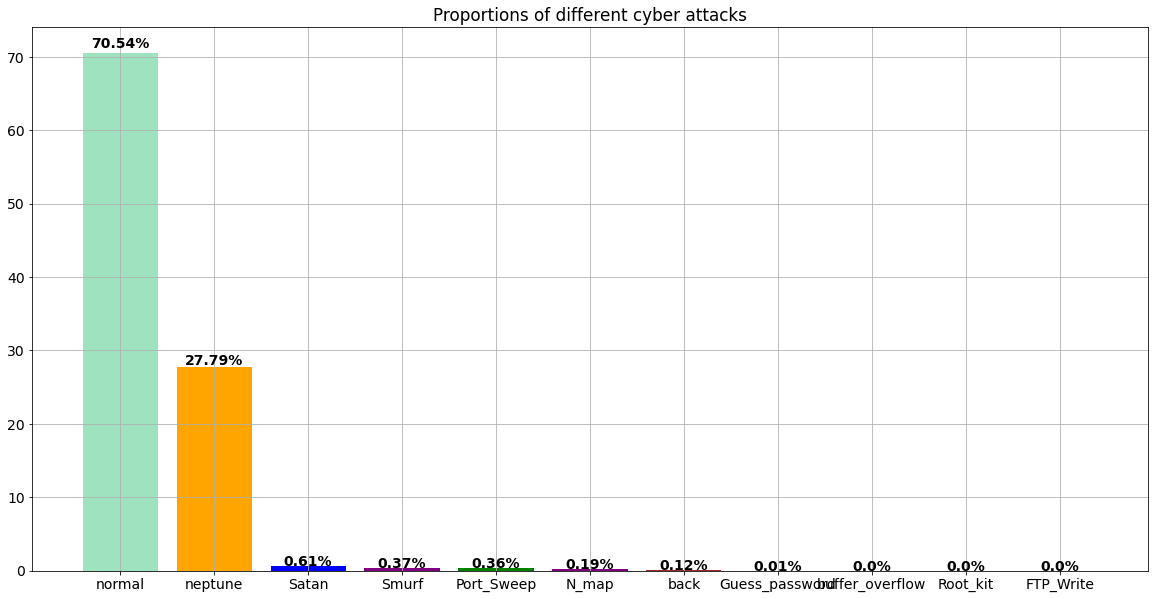

In [399]:
plt.figure(figsize=(20,10))
graph = plt.bar(Data.attack,Data.Percentage, color = ['#9FE2BF','Orange', 'Blue', 'Purple','Green','Purple','Brown','#DFFF00','#40E0D0','#9FE2BF','Red'])
plt.title('Proportions of different cyber attacks')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(Data.Percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

In [400]:
#Using pandas groupby, separate the datasets into groups based on their attacks and random sample from each group based on population proportion. The total sample size is 60%(0.6) of the population
sample = Network_data.groupby('attack', group_keys=False).apply(lambda x: x.sample(frac=0.6))

In [401]:
#Rechecking the proportions of the cyber attacks in the sample dataset.
((sample['attack'].value_counts()) / len(sample) * 100).round(2)

normal             70.54
neptune            27.79
Satan               0.61
Smurf               0.37
Port_Sweep          0.36
N_map               0.19
back                0.12
Guess_password      0.01
buffer_overflow     0.00
Root_kit            0.00
FTP_Write           0.00
Name: attack, dtype: float64

In [402]:
sample.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
6,0.0000,0.0,0.14,0.0,0.00676,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.004,0.10,0.0,0.10,0.05,0.0,0.0,0.0,0.0,FTP_Write
5,0.0067,0.0,0.34,0.0,0.00157,0.02703,0,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.001,0.05,0.1,0.05,0.00,0.0,0.0,0.0,0.0,FTP_Write
4,0.0032,0.0,0.07,0.0,0.00104,0.00449,0,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0,0.0,0.1,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.10,0.0,0.10,0.00,0.0,0.0,0.0,0.0,FTP_Write
7,0.0000,0.0,0.14,0.0,0.00000,0.00005,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.005,0.10,0.0,0.10,0.04,0.0,0.0,0.0,0.0,FTP_Write
0,0.0026,0.0,0.07,0.0,0.00116,0.00451,0,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0,0.0,0.1,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.10,0.0,0.10,0.00,0.0,0.0,0.0,0.0,FTP_Write


In [403]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490530 entries, 6 to 348434
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     490530 non-null  float64
 1   protocol_type                490530 non-null  float64
 2   service                      490530 non-null  float64
 3   flag                         490530 non-null  float64
 4   src_bytes                    490530 non-null  float64
 5   dst_bytes                    490530 non-null  float64
 6   land                         490530 non-null  int64  
 7   wrong_fragment               490530 non-null  float64
 8   urgent                       490530 non-null  float64
 9   hot                          490530 non-null  float64
 10  num_failed_logins            490530 non-null  float64
 11  logged_in                    490530 non-null  float64
 12  num_compromised              490530 non-null  float64
 13 

In [404]:
#checking the null values in the sample dataset.
sample.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_error_rate                 0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [405]:
#checking the duplicate values in the sample dataset.
sample.duplicated().sum()/sample.duplicated().count()

0.0

In [406]:
sample.describe().round(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,490530.00,490530.00,490530.00,490530.00,490530.00,490530.00,490530.0,490530.0,490530.0,490530.00,490530.0,490530.00,490530.00,490530.0,490530.0,490530.00,490530.00,490530.0,490530.00,490530.0,490530.0,490530.00,490530.00,490530.00,490530.00,490530.00,490530.00,490530.00,490530.00,490530.00,490530.00,490530.00,490530.00,490530.00,490530.00,490530.00,490530.0,490530.00,490530.00,490530.00,490530.00
mean,0.00,0.00,0.05,0.02,0.00,0.02,0.0,0.0,0.0,0.00,0.0,0.06,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.06,0.01,0.02,0.02,0.01,0.01,0.07,0.00,0.01,0.17,0.16,0.07,0.00,0.01,0.0,0.02,0.02,0.01,0.01
std,0.03,0.00,0.10,0.03,0.03,0.07,0.0,0.0,0.0,0.04,0.0,0.05,0.01,0.0,0.0,0.03,0.01,0.0,0.01,0.0,0.0,0.01,0.09,0.03,0.04,0.04,0.02,0.02,0.04,0.01,0.02,0.10,0.11,0.04,0.01,0.02,0.0,0.04,0.04,0.02,0.02
min,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.05,0.02,0.01,0.00,0.00,0.0,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.10,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.10,0.00,0.00,0.26,0.26,0.10,0.00,0.00,0.0,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.12,0.07,0.00,0.02,0.0,0.0,0.0,0.00,0.0,0.10,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.11,0.02,0.02,0.02,0.00,0.00,0.10,0.00,0.01,0.26,0.26,0.10,0.01,0.00,0.0,0.02,0.00,0.00,0.00
max,1.00,0.02,0.67,0.10,1.00,1.00,0.0,0.3,0.5,1.00,0.5,0.10,1.00,0.1,0.2,1.00,1.00,0.2,0.50,0.0,0.1,0.10,0.51,0.51,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.26,0.26,0.10,0.10,0.10,0.1,0.10,0.10,0.10,0.10


**Binomial / Binary Classification : normal vs attack**

**Multi class prediction : normal vs back vs buffer_overflow vs smurf vs satan vs neptune vs port_sweep vs Guess_password vs root_kit vs FTP Write**
    
**Classification -** 
**Balanced Dataset - 50% (1) 50% (0)**
**Imbalanced Dataset - 80% (1) 20% (0) | Rare Events 99% (0) 1% (1)**

**Binary Classification - Slight imbalances are permissible, we just change the evaluation metric**

**Multi class prediction - Always encouraged to use Balanced dataset.**

In [407]:
sample.attack.value_counts()

normal             346026
neptune            136337
Satan                3011
Smurf                1804
Port_Sweep           1778
N_map                 932
back                  581
Guess_password         32
buffer_overflow        18
Root_kit                6
FTP_Write               5
Name: attack, dtype: int64

In [408]:
# Creating M_Attack Y variables from dictionary.
#normal          : 0
#neptune         : 1
#Satan           : 2
#Smurf           : 3
#Port_Sweep      : 4  
#N_map           : 5
#back            : 6
#Guess_password  : 7
#buffer_overflow : 8
#Root_kit        : 9
#FTP_Write       : 10  

In [409]:
dic = {'normal': 0,
      'neptune' : 1,
      'Satan' : 2,
      'Smurf' : 3,
      'Port_Sweep' : 4,
      'N_map' : 5,
      'back' : 6,
      'Guess_password' : 7,
      'buffer_overflow' : 8,
      'Root_kit' : 9,
      'FTP_Write' : 10}

In [410]:
sample['Multi_Attack'] = sample['attack'].map(dic)

In [411]:
sample.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,Multi_Attack
6,0.0000,0.0,0.14,0.0,0.00676,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.004,0.10,0.0,0.10,0.05,0.0,0.0,0.0,0.0,FTP_Write,10
5,0.0067,0.0,0.34,0.0,0.00157,0.02703,0,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.001,0.05,0.1,0.05,0.00,0.0,0.0,0.0,0.0,FTP_Write,10
4,0.0032,0.0,0.07,0.0,0.00104,0.00449,0,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0,0.0,0.1,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.10,0.0,0.10,0.00,0.0,0.0,0.0,0.0,FTP_Write,10
7,0.0000,0.0,0.14,0.0,0.00000,0.00005,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.005,0.10,0.0,0.10,0.04,0.0,0.0,0.0,0.0,FTP_Write,10
0,0.0026,0.0,0.07,0.0,0.00116,0.00451,0,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0,0.0,0.1,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.10,0.0,0.10,0.00,0.0,0.0,0.0,0.0,FTP_Write,10


In [412]:
sample.Multi_Attack.value_counts()

0     346026
1     136337
2       3011
3       1804
4       1778
5        932
6        581
7         32
8         18
9          6
10         5
Name: Multi_Attack, dtype: int64

In [413]:
# Create B_Attack for binary classification

dib = {1:1,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1,10:1,0:0}

In [414]:
sample['Binary_attack'] = sample['Multi_Attack'].map(dib)

In [415]:
sample.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,Multi_Attack,Binary_attack
6,0.0000,0.0,0.14,0.0,0.00676,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.004,0.10,0.0,0.10,0.05,0.0,0.0,0.0,0.0,FTP_Write,10,1
5,0.0067,0.0,0.34,0.0,0.00157,0.02703,0,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.001,0.05,0.1,0.05,0.00,0.0,0.0,0.0,0.0,FTP_Write,10,1
4,0.0032,0.0,0.07,0.0,0.00104,0.00449,0,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0,0.0,0.1,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.10,0.0,0.10,0.00,0.0,0.0,0.0,0.0,FTP_Write,10,1
7,0.0000,0.0,0.14,0.0,0.00000,0.00005,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.005,0.10,0.0,0.10,0.04,0.0,0.0,0.0,0.0,FTP_Write,10,1
0,0.0026,0.0,0.07,0.0,0.00116,0.00451,0,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0,0.0,0.1,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.10,0.0,0.10,0.00,0.0,0.0,0.0,0.0,FTP_Write,10,1


In [416]:
#Creating a copy of the sample data just to work out some operations for the final data preparations.
final_sample = sample.copy()

In [417]:
final_sample.drop(['attack'], axis = 1, inplace = True)

In [418]:
final_sample

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Multi_Attack,Binary_attack
6,0.0000,0.00,0.14,0.0,0.00676,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.00,0.001,0.004,0.100,0.000,0.100,0.050,0.0,0.0,0.00,0.000,10,1
5,0.0067,0.00,0.34,0.0,0.00157,0.02703,0,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.00,0.002,0.001,0.050,0.100,0.050,0.000,0.0,0.0,0.00,0.000,10,1
4,0.0032,0.00,0.07,0.0,0.00104,0.00449,0,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0,0.0,0.1,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.00,0.001,0.001,0.100,0.000,0.100,0.000,0.0,0.0,0.00,0.000,10,1
7,0.0000,0.00,0.14,0.0,0.00000,0.00005,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.00,0.002,0.005,0.100,0.000,0.100,0.040,0.0,0.0,0.00,0.000,10,1
0,0.0026,0.00,0.07,0.0,0.00116,0.00451,0,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0,0.0,0.1,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.00,0.001,0.001,0.100,0.000,0.100,0.000,0.0,0.0,0.00,0.000,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390656,0.0000,0.01,0.02,0.0,0.00045,0.00045,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.118,0.118,0.0,0.0,0.0,0.0,0.1,0.0,0.00,0.255,0.255,0.100,0.000,0.000,0.000,0.0,0.0,0.00,0.000,0,0
178921,0.0000,0.00,0.14,0.0,0.10261,0.00000,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.011,0.011,0.0,0.0,0.0,0.0,0.1,0.0,0.00,0.033,0.100,0.052,0.012,0.052,0.003,0.0,0.0,0.00,0.000,0,0
154122,0.0000,0.00,0.00,0.0,0.00230,0.03584,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.004,0.005,0.0,0.0,0.0,0.0,0.1,0.0,0.04,0.004,0.255,0.100,0.000,0.025,0.007,0.0,0.0,0.00,0.000,0,0
380081,0.0000,0.00,0.00,0.0,0.00338,0.03360,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.00,0.004,0.152,0.100,0.000,0.025,0.015,0.0,0.0,0.05,0.095,0,0


# EDA: Exploratory Data Analysis

In [419]:
final_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490530 entries, 6 to 348434
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     490530 non-null  float64
 1   protocol_type                490530 non-null  float64
 2   service                      490530 non-null  float64
 3   flag                         490530 non-null  float64
 4   src_bytes                    490530 non-null  float64
 5   dst_bytes                    490530 non-null  float64
 6   land                         490530 non-null  int64  
 7   wrong_fragment               490530 non-null  float64
 8   urgent                       490530 non-null  float64
 9   hot                          490530 non-null  float64
 10  num_failed_logins            490530 non-null  float64
 11  logged_in                    490530 non-null  float64
 12  num_compromised              490530 non-null  float64
 13 

In [420]:
final_sample.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Multi_Attack,Binary_attack
6,0.0000,0.0,0.14,0.0,0.00676,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.004,0.10,0.0,0.10,0.05,0.0,0.0,0.0,0.0,10,1
5,0.0067,0.0,0.34,0.0,0.00157,0.02703,0,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.001,0.05,0.1,0.05,0.00,0.0,0.0,0.0,0.0,10,1
4,0.0032,0.0,0.07,0.0,0.00104,0.00449,0,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0,0.0,0.1,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.10,0.0,0.10,0.00,0.0,0.0,0.0,0.0,10,1
7,0.0000,0.0,0.14,0.0,0.00000,0.00005,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.005,0.10,0.0,0.10,0.04,0.0,0.0,0.0,0.0,10,1
0,0.0026,0.0,0.07,0.0,0.00116,0.00451,0,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0,0.0,0.1,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.10,0.0,0.10,0.00,0.0,0.0,0.0,0.0,10,1


In [421]:
final_sample.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_error_rate                 0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

# Segregating all the variables into Nominal variables, Binary variables and Numerical variables.

In [422]:
Nominal_var = ["protocol_type", "service", "flag"]

In [423]:
Binary_var = ["land", "logged_in", "root_shell", "su_attempted", "is_host_login", "is_guest_login"]

In [424]:
Numerical_var = list(set(final_sample.columns).difference(set(Nominal_var).union(set(Binary_var))).difference(['Binary_Attack','Multi_Attack']))

In [425]:
Numerical_var

['dst_host_srv_count',
 'serror_rate',
 'srv_count',
 'dst_host_same_src_port_rate',
 'hot',
 'srv_diff_host_rate',
 'count',
 'num_shells',
 'dst_host_serror_rate',
 'dst_host_rerror_rate',
 'num_file_creations',
 'num_outbound_cmds',
 'dst_host_srv_serror_rate',
 'dst_bytes',
 'srv_error_rate',
 'dst_host_srv_diff_host_rate',
 'num_failed_logins',
 'dst_host_count',
 'urgent',
 'srv_rerror_rate',
 'rerror_rate',
 'num_compromised',
 'num_access_files',
 'wrong_fragment',
 'num_root',
 'duration',
 'dst_host_srv_rerror_rate',
 'Binary_attack',
 'dst_host_same_srv_rate',
 'same_srv_rate',
 'src_bytes',
 'dst_host_diff_srv_rate',
 'diff_srv_rate']

Binary_attack
0    346026
1    144504
Name: land, dtype: int64


<AxesSubplot:xlabel='Binary_attack'>

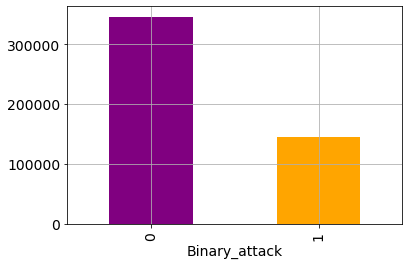

In [426]:
# Binary variables classification
print(final_sample.groupby('Binary_attack')['land'].count())
final_sample.groupby('Binary_attack')['land'].count().plot(kind = 'bar', color = ['purple','orange'])

In [427]:
final_sample.Binary_attack.value_counts()
print('normal_percentage = ',round(346026/(346026+144504)*100,2),'%')
print('attack_percentage = ',round(144504/(346026+144504)*100,2),'%')

normal_percentage =  70.54 %
attack_percentage =  29.46 %


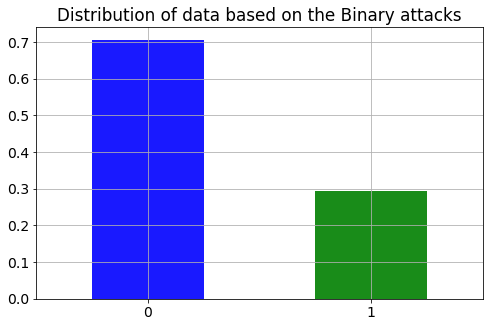

The above plot shows a distribution of around 70:30 between mormal and attack data respectively. We can see that the data is definitely not balanced.


In [428]:
fig = plt.figure(figsize = (8,5))
final_sample.Binary_attack.value_counts(normalize = True).plot(kind='bar', color= ['blue','green'], alpha = 0.9, rot=0)
plt.title('Distribution of data based on the Binary attacks')
plt.show()
print('The above plot shows a distribution of around 70:30 between mormal and attack data respectively. We can see that the data is definitely not balanced.')

In [429]:
# Relationship Y Binomial

final_sample.groupby('Binary_attack').mean()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Multi_Attack
Binary_attack,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.000674,0.000633,0.008524,0.001125,0.006053,0.035116,0.0,0.000000,0.000004,0.003156,0.000011,0.090247,0.000227,0.000044,0.000016,0.002076,0.000419,0.000027,0.000512,0.0,2.889956e-07,0.000389,0.010204,0.013666,0.000149,0.000182,0.002153,0.002172,0.099557,0.000684,0.014059,0.131504,0.223333,0.092132,0.001163,0.007551,0.002332,0.000174,0.000076,0.002294,0.002139,0.000000
1,0.001312,0.000417,0.159154,0.065760,0.002306,0.000356,0.0,0.000002,0.000001,0.000832,0.000024,0.000446,0.000405,0.000009,0.000000,0.000021,0.000012,0.000000,0.000001,0.0,0.000000e+00,0.000002,0.178698,0.015117,0.084038,0.084269,0.012950,0.012772,0.011010,0.008363,0.000488,0.251668,0.014066,0.006127,0.008662,0.002803,0.000120,0.084082,0.084261,0.012662,0.012730,1.131463


# Checking if the data is Balanced or Imbalanced.

In [430]:
#The above plot shows a distribution of around 70:30 between mormal and attack data respectively. We can see that the data is definitely not balanced.
#So, we can do Undersampling technique to balance the datasets otherwise As you can see, this model is only predicting 0, which means it’s completely ignoring the minority class in favor of the majority class.
df_majority = final_sample[final_sample.Binary_attack == 0]
df_minority = final_sample[final_sample.Binary_attack == 1]

In [431]:
df_majority_undersample = df_majority.sample(replace = False, n = 144504, random_state = 123)

In [432]:
balance_sample = pd.concat([df_majority_undersample, df_minority])
print(balance_sample.Binary_attack.value_counts())
balance_sample.shape

0    144504
1    144504
Name: Binary_attack, dtype: int64


(289008, 43)

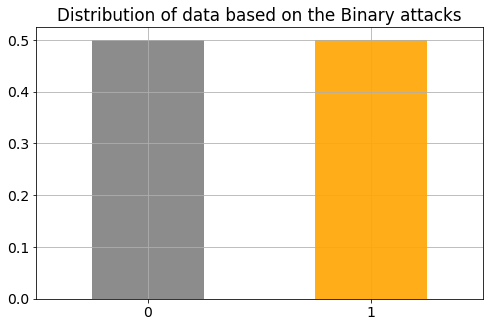

In [433]:
fig = plt.figure(figsize = (8,5))
balance_sample.Binary_attack.value_counts(normalize = True).plot(kind='bar', color= ['grey','orange'], alpha = 0.9, rot=0)
plt.title('Distribution of data based on the Binary attacks')
plt.show()

# Outliers Identification and Treatment:

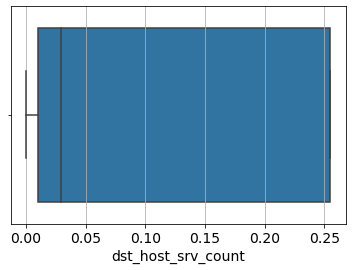

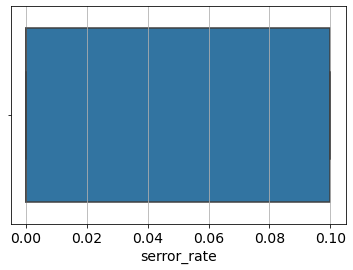

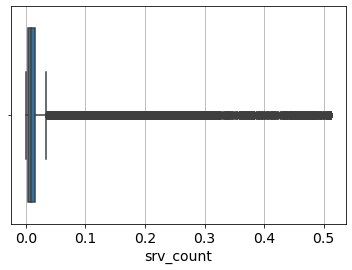

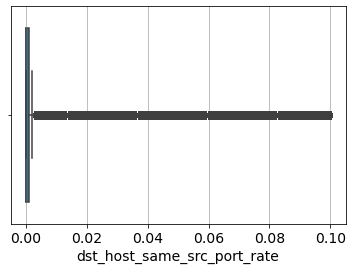

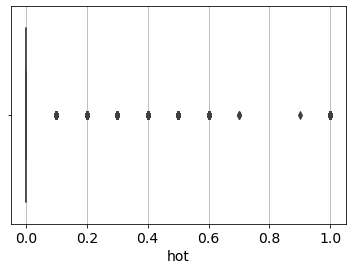

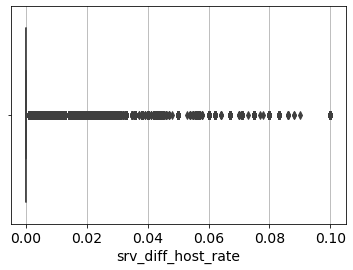

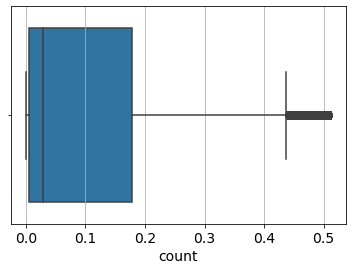

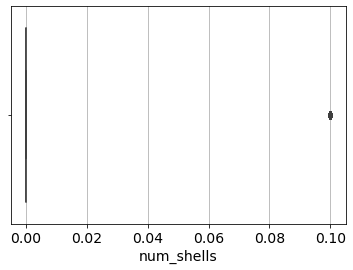

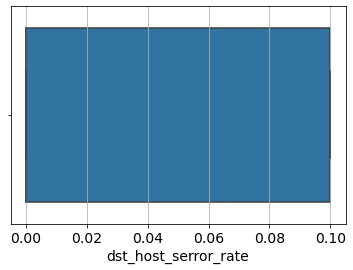

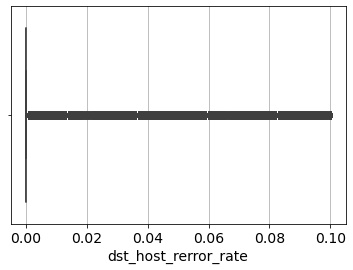

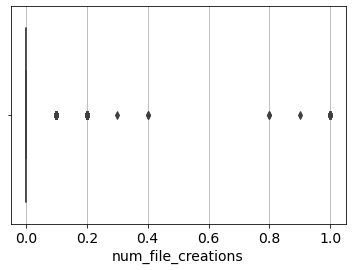

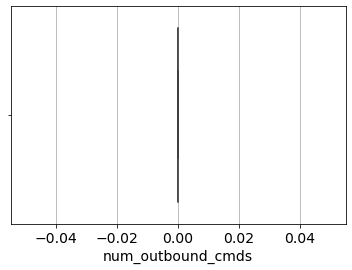

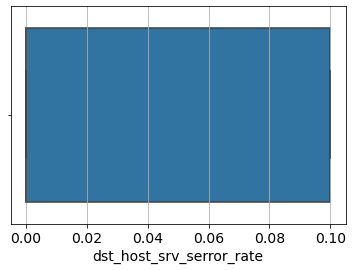

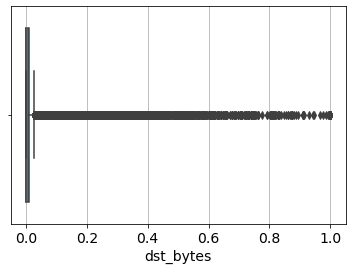

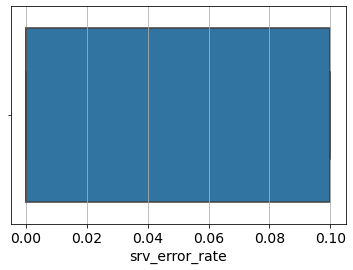

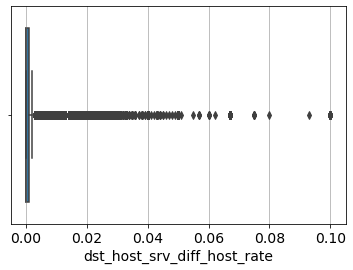

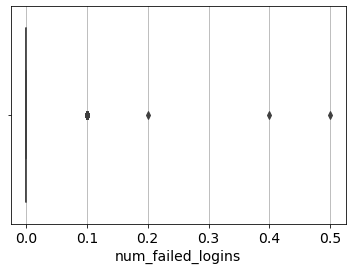

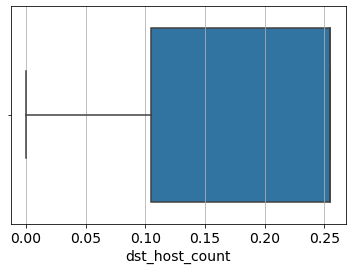

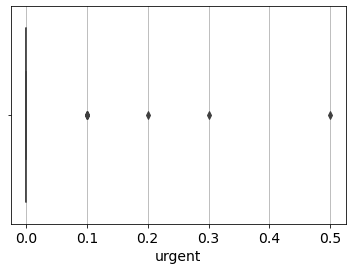

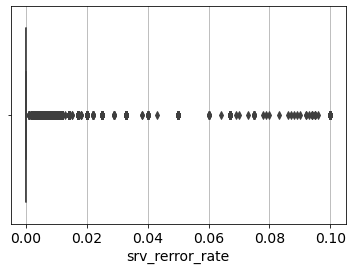

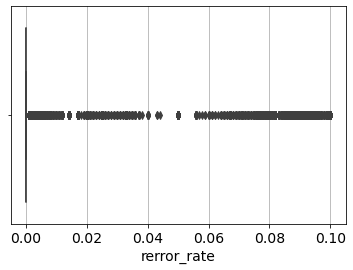

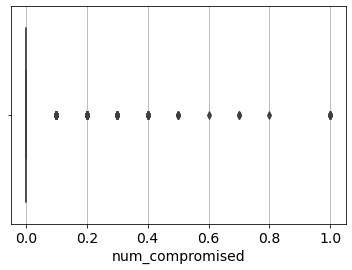

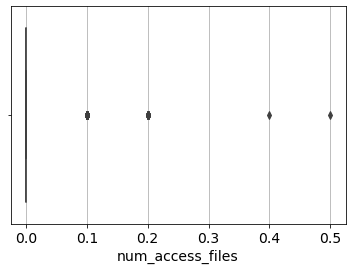

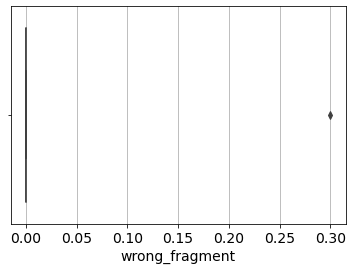

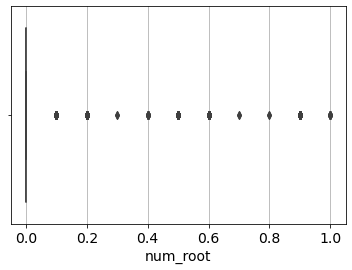

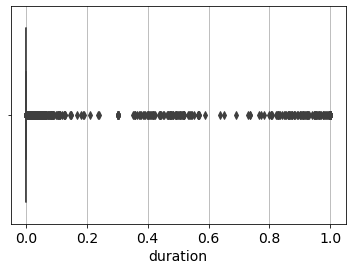

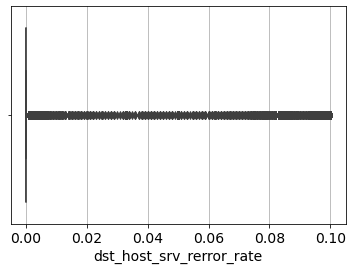

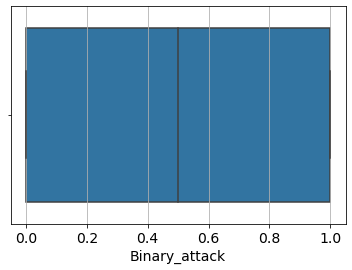

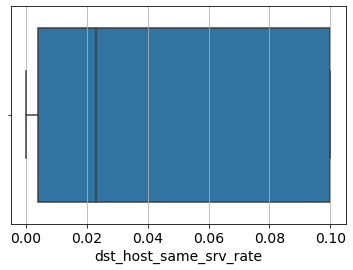

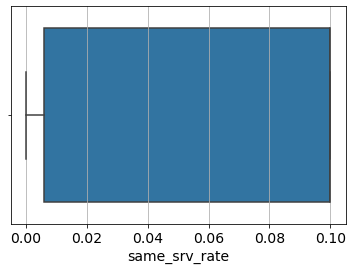

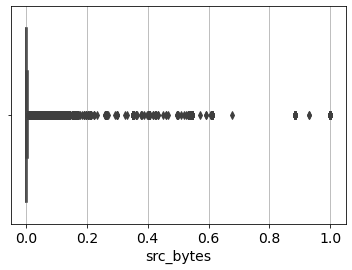

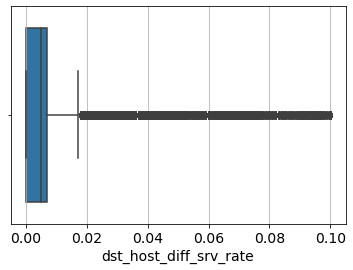

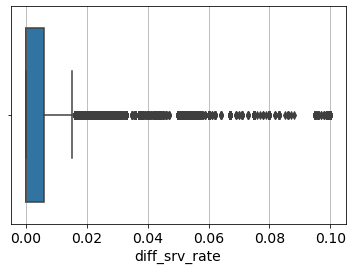

In [434]:
for col in Numerical_var:
    sns.boxplot(balance_sample[col])
    plt.show()

<AxesSubplot:>

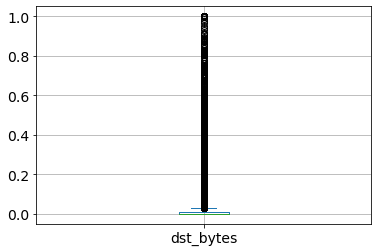

In [435]:
balance_sample.dst_bytes.plot(kind = 'box')

In [436]:
balance_sample['dst_bytes'] = balance_sample.dst_bytes.clip(lower = balance_sample.dst_bytes.quantile(0.01) , upper = balance_sample.dst_bytes.quantile(0.99))

<AxesSubplot:>

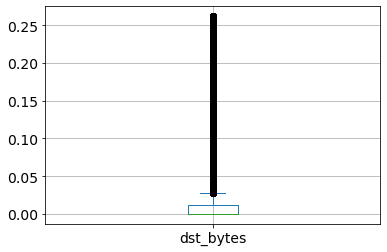

In [437]:
balance_sample.dst_bytes.plot(kind = 'box')

In [438]:
def outlier_treatment(x):
    x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99))
    return x

In [439]:
balance_sample = balance_sample.apply(outlier_treatment)

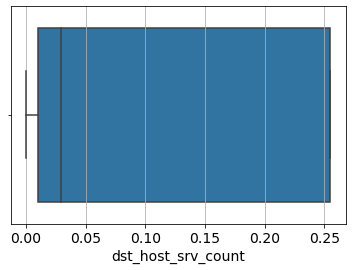

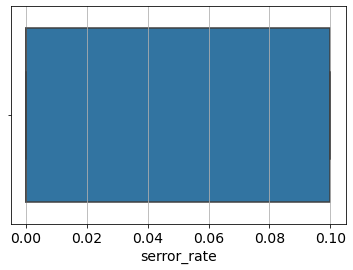

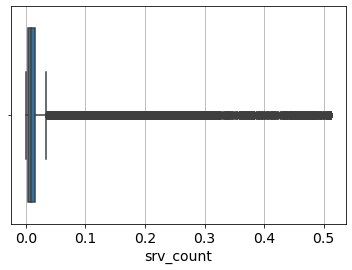

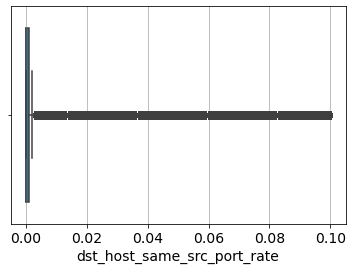

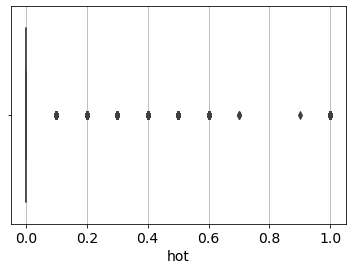

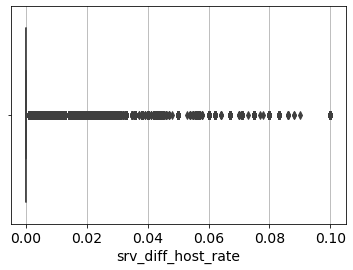

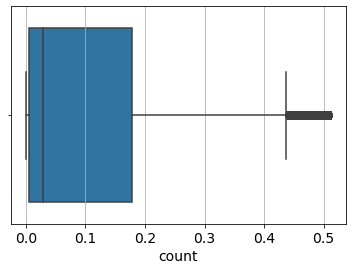

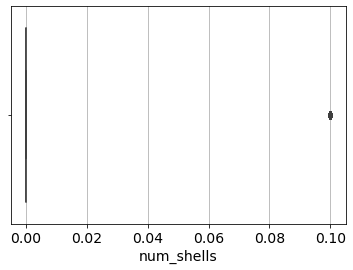

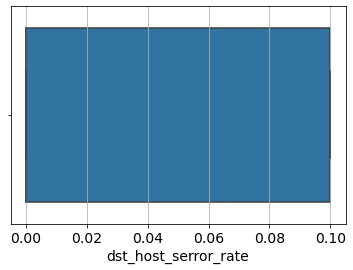

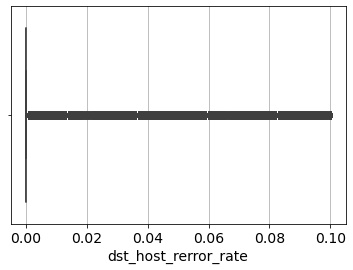

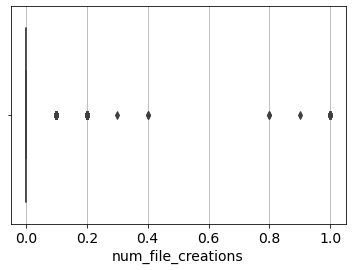

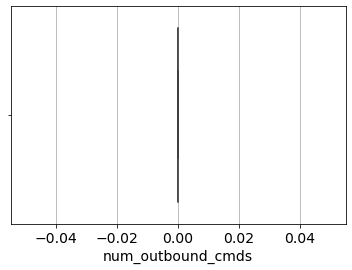

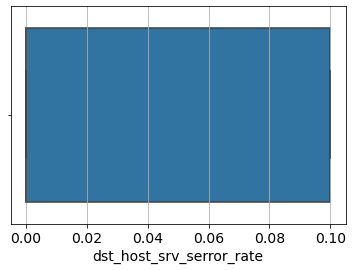

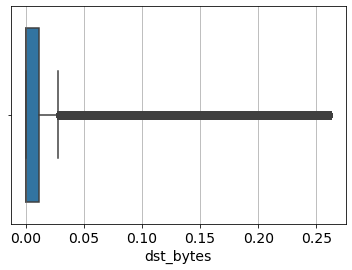

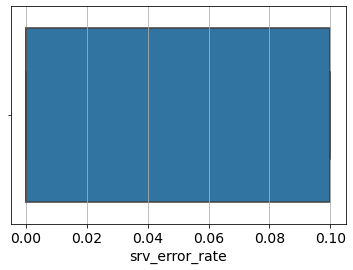

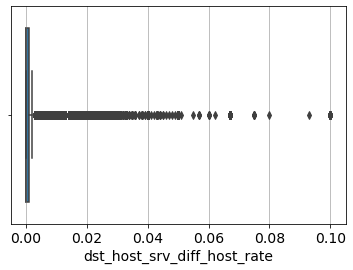

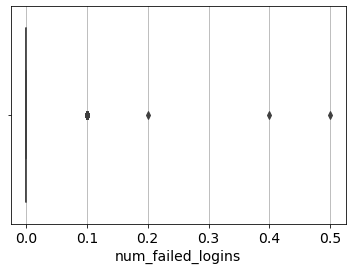

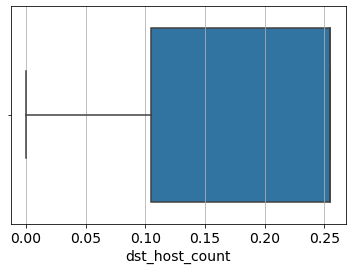

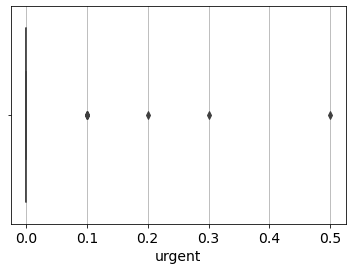

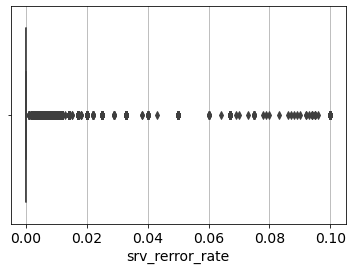

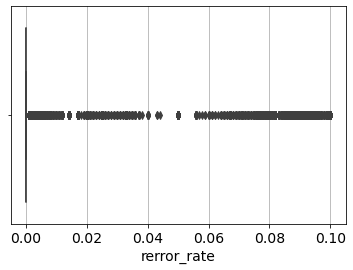

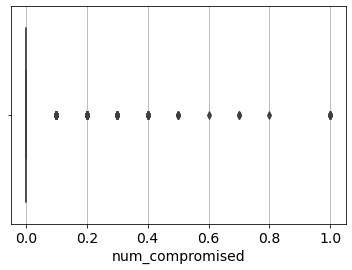

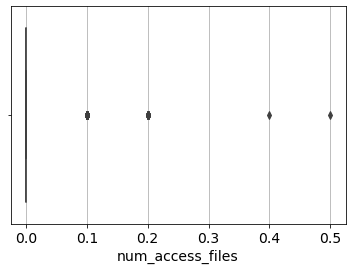

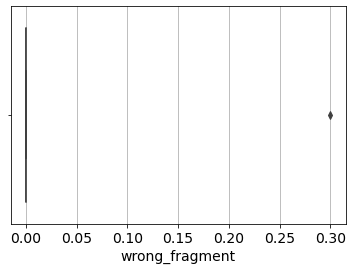

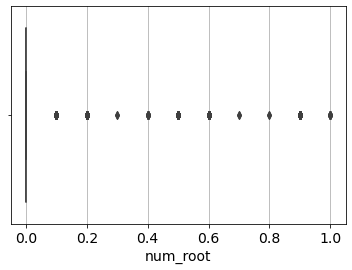

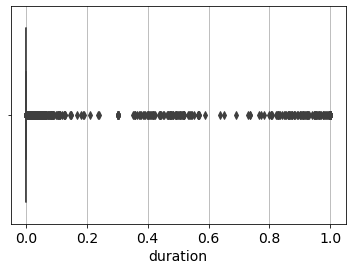

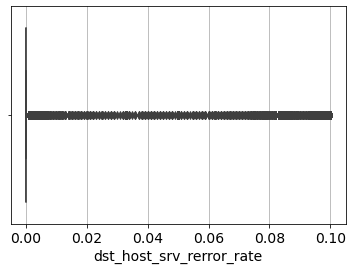

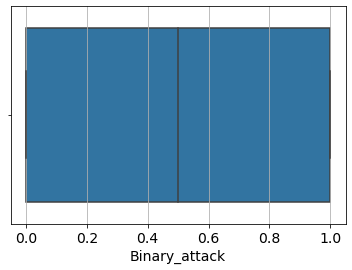

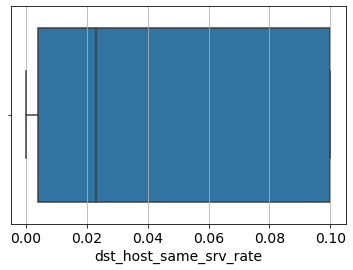

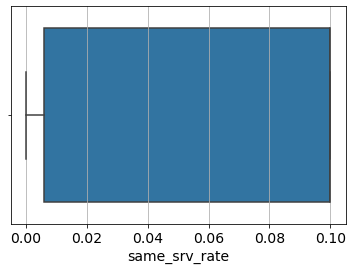

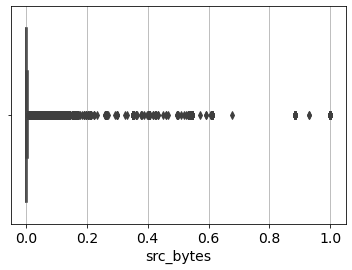

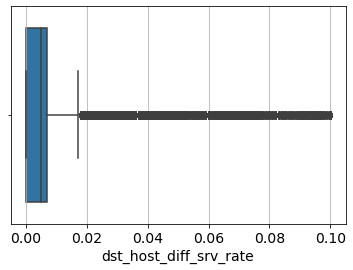

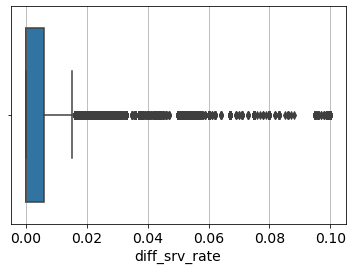

In [440]:
for col in Numerical_var:
    sns.boxplot(balance_sample[col])
    plt.show()

# Selecting features for model building:

**Removing the unnecessary or less important columns that shows less or no variation in the data.**

In [441]:
l = []
for i in balance_sample.columns:
    if (len(balance_sample[i].unique()) == 1):
        l.append(i)
        print(i, balance_sample[i].unique())
        
print(l)

land [0]
num_outbound_cmds [0]
is_host_login [0.]
['land', 'num_outbound_cmds', 'is_host_login']


In [442]:
balance_sample.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Multi_Attack,Binary_attack
124770,0.0,0.0,0.0,0.0,0.00202,0.007510,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.00,0.255,0.255,0.100,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0,0
303415,0.0,0.0,0.0,0.0,0.00254,0.019700,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.00,0.255,0.228,0.089,0.001,0.000,0.000,0.0,0.000,0.0,0.0,0,0
220107,0.0,0.0,0.0,0.0,0.00308,0.017430,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.016,0.016,0.0,0.0,0.0,0.0,0.1,0.0,0.00,0.033,0.255,0.100,0.000,0.003,0.001,0.0,0.001,0.0,0.0,0,0
145861,0.0,0.0,0.0,0.0,0.00310,0.009540,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.003,0.005,0.0,0.0,0.0,0.0,0.1,0.0,0.04,0.025,0.255,0.100,0.000,0.004,0.005,0.0,0.000,0.0,0.0,0,0
560986,0.0,0.0,0.0,0.0,0.00312,0.261998,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.002,0.005,0.0,0.0,0.0,0.0,0.1,0.0,0.06,0.019,0.255,0.100,0.000,0.005,0.003,0.0,0.000,0.0,0.0,0,0


In [443]:
balance_sample.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_error_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Multi_Attack',
       'Binary_attack'],
      dtype='object')

In [444]:
Num_col_dropped = ['wrong_fragment', 'num_outbound_cmds']

In [445]:
Nominal_var

['protocol_type', 'service', 'flag']

# SPLITTING THE TRAINING AND TESTING DATASETS:

In [446]:
# 70% : train data
# 30% : test data
train, test = train_test_split(balance_sample, test_size = 0.3, random_state = 4)

In [447]:
balance_sample.shape

(289008, 43)

In [448]:
train.shape

(202305, 43)

In [449]:
test.shape

(86703, 43)

# Binomial Classification

**Checking the linearity of the variables with the output variable.**

In [450]:
Numerical_var

['dst_host_srv_count',
 'serror_rate',
 'srv_count',
 'dst_host_same_src_port_rate',
 'hot',
 'srv_diff_host_rate',
 'count',
 'num_shells',
 'dst_host_serror_rate',
 'dst_host_rerror_rate',
 'num_file_creations',
 'num_outbound_cmds',
 'dst_host_srv_serror_rate',
 'dst_bytes',
 'srv_error_rate',
 'dst_host_srv_diff_host_rate',
 'num_failed_logins',
 'dst_host_count',
 'urgent',
 'srv_rerror_rate',
 'rerror_rate',
 'num_compromised',
 'num_access_files',
 'wrong_fragment',
 'num_root',
 'duration',
 'dst_host_srv_rerror_rate',
 'Binary_attack',
 'dst_host_same_srv_rate',
 'same_srv_rate',
 'src_bytes',
 'dst_host_diff_srv_rate',
 'diff_srv_rate']

In [451]:
Numerical_col2 = set(Numerical_var).difference(set(Num_col_dropped))
Numerical_col2

{'Binary_attack',
 'count',
 'diff_srv_rate',
 'dst_bytes',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_rerror_rate',
 'dst_host_same_src_port_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'duration',
 'hot',
 'num_access_files',
 'num_compromised',
 'num_failed_logins',
 'num_file_creations',
 'num_root',
 'num_shells',
 'rerror_rate',
 'same_srv_rate',
 'serror_rate',
 'src_bytes',
 'srv_count',
 'srv_diff_host_rate',
 'srv_error_rate',
 'srv_rerror_rate',
 'urgent'}

In [452]:
# Taking a sample data out of the final sample containing only the continuous/numerical variables so that we can perform the correlations and variable reduction techniques.
sample_data = train.loc[:,Numerical_col2]

In [453]:
sample_data = sample_data.drop(columns = 'Binary_attack')

# Bivariate Relationship

<AxesSubplot:>

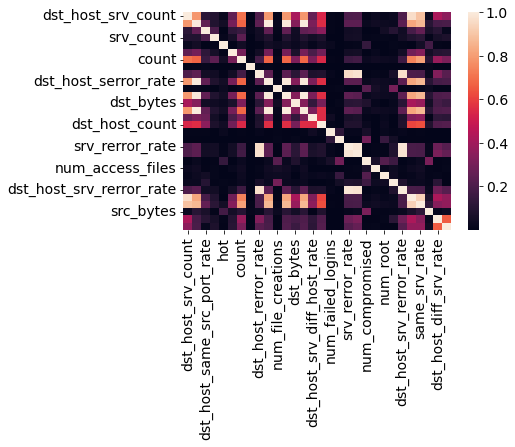

In [454]:
sns.heatmap(sample_data.corr().abs())

In [455]:
Bivariate_relation = pd.DataFrame(sample_data.corrwith(train['Binary_attack']).abs().sort_values(ascending = False))
imp_vars_BR = Bivariate_relation.sort_values(by = 0,ascending = False).reset_index()
imp_vars_Bivariate = imp_vars_BR['index'].values.tolist()
imp_vars_Bivariate

['same_srv_rate',
 'dst_host_same_srv_rate',
 'dst_host_srv_count',
 'dst_host_srv_serror_rate',
 'srv_error_rate',
 'dst_host_serror_rate',
 'serror_rate',
 'count',
 'dst_host_count',
 'dst_bytes',
 'dst_host_diff_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_diff_host_rate',
 'srv_diff_host_rate',
 'rerror_rate',
 'dst_host_srv_rerror_rate',
 'srv_rerror_rate',
 'dst_host_rerror_rate',
 'dst_host_same_src_port_rate',
 'src_bytes',
 'num_access_files',
 'num_root',
 'hot',
 'num_file_creations',
 'srv_count',
 'duration',
 'num_shells',
 'num_compromised',
 'num_failed_logins',
 'urgent']

# Univariate Regression for Variable Reduction

In [456]:
model = smf.logit('Binary_attack~same_srv_rate', data = train).fit()

Optimization terminated successfully.
         Current function value: 0.087117
         Iterations 10


In [457]:
metrics.roc_auc_score(train.Binary_attack, model.predict())

0.983201592770713

In [458]:
model = smf.logit('Binary_attack~dst_host_same_src_port_rate', data = train).fit()
metrics.roc_auc_score(train.Binary_attack, model.predict())

Optimization terminated successfully.
         Current function value: 0.682256
         Iterations 6


0.7956049518855709

In [459]:
#### Univariate Regression
somerced_val = pd.DataFrame()
for i_var in sample_data.columns:
    print(i_var)
    model = smf.logit('Binary_attack~'+str(i_var), data = train).fit()
    somerce_d = 2*metrics.roc_auc_score(train.Binary_attack, model.predict())-1
    temp = pd.DataFrame([i_var, somerce_d]).T
    somerced_val = pd.concat([somerced_val, temp], axis=0)

dst_host_srv_count
Optimization terminated successfully.
         Current function value: 0.156765
         Iterations 9
serror_rate
Optimization terminated successfully.
         Current function value: 0.230787
         Iterations 12
dst_host_same_src_port_rate
Optimization terminated successfully.
         Current function value: 0.682256
         Iterations 6
srv_count
Optimization terminated successfully.
         Current function value: 0.692966
         Iterations 4
hot
Optimization terminated successfully.
         Current function value: 0.692491
         Iterations 6
srv_diff_host_rate
Optimization terminated successfully.
         Current function value: 0.591367
         Iterations 9
count
Optimization terminated successfully.
         Current function value: 0.168359
         Iterations 10
num_shells
         Current function value: 0.693076
         Iterations: 35
dst_host_rerror_rate
Optimization terminated successfully.
         Current function value: 0.670846
        

In [460]:
imp_vars_UR = somerced_val.sort_values(by = 1, ascending = False)

In [461]:
imp_vars_UR 

,0,1
0,dst_host_same_srv_rate,0.969449
0,same_srv_rate,0.966403
0,dst_host_srv_count,0.960924
0,diff_srv_rate,0.949782
0,src_bytes,0.946895
0,count,0.944358
0,dst_bytes,0.92362
0,dst_host_diff_srv_rate,0.905299
0,dst_host_serror_rate,0.852438
0,serror_rate,0.851785


In [462]:
imp_vars_Univariate = imp_vars_UR[0].values.tolist()

In [463]:
imp_vars_Univariate

['dst_host_same_srv_rate',
 'same_srv_rate',
 'dst_host_srv_count',
 'diff_srv_rate',
 'src_bytes',
 'count',
 'dst_bytes',
 'dst_host_diff_srv_rate',
 'dst_host_serror_rate',
 'serror_rate',
 'srv_error_rate',
 'dst_host_srv_serror_rate',
 'dst_host_count',
 'dst_host_srv_diff_host_rate',
 'dst_host_same_src_port_rate',
 'srv_diff_host_rate',
 'rerror_rate',
 'srv_count',
 'srv_rerror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'num_access_files',
 'num_root',
 'num_compromised',
 'num_file_creations',
 'hot',
 'num_shells',
 'num_failed_logins',
 'urgent',
 'duration']

# SELECT K BEST Feature Elimination:

In [464]:
SKB = SelectKBest(f_classif, k=15).fit(train, train['Binary_attack'])

In [465]:
SKB.get_support()

array([False, False,  True,  True, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True,  True, False,
       False,  True, False, False,  True,  True,  True, False, False,
       False,  True,  True, False, False,  True,  True])

In [466]:
imp_vars_kbest = train.columns[SKB.get_support()]

In [467]:
imp_vars_kbest

Index(['service', 'flag', 'dst_bytes', 'logged_in', 'count', 'serror_rate',
       'srv_error_rate', 'same_srv_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'Multi_Attack', 'Binary_attack'],
      dtype='object')

# Final Selected variables

In [468]:
temp_vars = set(imp_vars_Univariate).intersection(set(imp_vars_kbest))
temp_vars

{'count',
 'dst_bytes',
 'dst_host_count',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_serror_rate',
 'same_srv_rate',
 'serror_rate',
 'srv_error_rate'}

In [469]:
final_vars = set(temp_vars).intersection(set(imp_vars_Bivariate))
final_vars

{'count',
 'dst_bytes',
 'dst_host_count',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_serror_rate',
 'same_srv_rate',
 'serror_rate',
 'srv_error_rate'}

In [470]:
Final_sample = train[['count','diff_srv_rate','dst_bytes','dst_host_count','dst_host_diff_srv_rate','dst_host_same_srv_rate','dst_host_serror_rate','dst_host_srv_count','dst_host_srv_serror_rate','same_srv_rate','serror_rate','srv_error_rate','Binary_attack']]

In [471]:
Final_sample.head(5)

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,dst_host_srv_serror_rate,same_srv_rate,serror_rate,srv_error_rate,Binary_attack
39433,0.226,0.007,0.00000,0.255,0.007,0.004,0.1,0.010,0.1,0.004,0.1,0.1,1
87171,0.244,0.006,0.00000,0.255,0.008,0.001,0.1,0.003,0.1,0.002,0.1,0.1,1
207582,0.001,0.000,0.14496,0.255,0.000,0.100,0.0,0.255,0.0,0.100,0.0,0.0,0
41578,0.145,0.006,0.00000,0.255,0.005,0.005,0.1,0.012,0.1,0.008,0.1,0.1,1
32773,0.114,0.006,0.00000,0.255,0.007,0.007,0.1,0.018,0.1,0.016,0.1,0.1,1


# Running the Variable Inflation Factor tests to check the Collinearity.

**Checking the collinearity between the independent variables and we will be using the Forward selection/Backward elimination method to select the features as it is much more intuitive to get the model with a more general behaviour.**
**We want as least as possible the number of variables which are truly explaining the Interest rate.**
***Backward Elimination Technique:***
***Eliminating the variables level-wise based on Variable Inflation Factor scores and checking the VIF values at each level.***

In [472]:
X = Final_sample.drop(columns = 'Binary_attack')

In [473]:
X_new = pd.Series(variance_inflation_factor(X.values,i) for i in range(len(X.columns)))

In [474]:
vif_data = pd.concat([pd.Series(X.columns),X_new], axis = 1)

In [475]:
vif_data.columns = ['features','VIF']

In [476]:
vif_data.sort_values(by = 'VIF', ascending = False)

,features,VIF
11,srv_error_rate,1078.339818
8,dst_host_srv_serror_rate,975.949222
10,serror_rate,779.993781
6,dst_host_serror_rate,611.885124
5,dst_host_same_srv_rate,51.682469
7,dst_host_srv_count,30.717693
9,same_srv_rate,22.065131
3,dst_host_count,6.888816
0,count,4.554574
4,dst_host_diff_srv_rate,2.806463


In [477]:
X1 = X.drop(columns = ['srv_error_rate','dst_host_srv_serror_rate','serror_rate','dst_host_serror_rate'])

In [478]:
X2 = X1.drop(columns = ['dst_host_same_srv_rate','dst_host_srv_count','same_srv_rate'])

In [479]:
X_new = pd.Series(variance_inflation_factor(X2.values,i) for i in range(len(X2.columns)))

In [480]:
vif_data = pd.concat([pd.Series(X2.columns),X_new], axis = 1)

In [481]:
vif_data.columns = ['features','VIF']

In [482]:
vif_data.sort_values(by = 'VIF', ascending = False)

,features,VIF
0,count,2.935140
3,dst_host_count,2.827410
4,dst_host_diff_srv_rate,2.307053
1,diff_srv_rate,2.067253
2,dst_bytes,1.100157


# Training the Model using Logistic Regression.

In [483]:
#We will be eliminating the variables one by one based on p-values as we want the p-value < 0.05.
formula = 'Binary_attack~count+dst_host_count+dst_host_diff_srv_rate+diff_srv_rate+dst_bytes'

In [484]:
Logistic_model = smf.logit(formula, data = train).fit()

Optimization terminated successfully.
         Current function value: 0.109999
         Iterations 10


In [485]:
print(Logistic_model.summary())

                           Logit Regression Results                           
Dep. Variable:          Binary_attack   No. Observations:               202305
Model:                          Logit   Df Residuals:                   202299
Method:                           MLE   Df Model:                            5
Date:                Fri, 21 Oct 2022   Pseudo R-squ.:                  0.8413
Time:                        16:01:53   Log-Likelihood:                -22253.
converged:                       True   LL-Null:                   -1.4023e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -5.7754      0.061    -95.134      0.000      -5.894      -5.656
count                     43.7601      0.346    126.307      0.000      43.081      44.439
dst_

# Creating the Confusion matrix and checking the Model evaluation metric.

In [486]:
## Train Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
train_prob = Logistic_model.predict(train)

In [487]:
train['predicted_proba'] = train_prob

In [488]:
train_auc = metrics.roc_auc_score(train.Binary_attack,train_prob)
train_gini = (2*train_auc) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)
print("The AUC for the model built on the Train Data is : ", train_auc)

The Gini Index for the model built on the Train Data is :  0.9753526276976829
The AUC for the model built on the Train Data is :  0.9876763138488415


In [489]:
matrix = train[['Binary_attack','predicted_proba']].reset_index()
matrix = matrix.drop(columns = 'index')
matrix['predict_attack'] = pd.Series(np.where(train.predicted_proba> 0.5, 1, 0))
matrix

,Binary_attack,predicted_proba,predict_attack
0,1,0.999766,1
1,1,0.999901,1
2,0,0.000950,0
3,1,0.989297,1
4,1,0.968043,1
...,...,...,...
202300,0,0.001602,0
202301,0,0.010943,0
202302,0,0.000095,0
202303,0,0.002753,0


In [490]:
pd.crosstab(matrix.Binary_attack, matrix.predict_attack, margins = True)

predict_attack,0,1,All
Binary_attack,,,
0,98618,2300,100918
1,2910,98477,101387
All,101528,100777,202305


In [491]:
print(metrics.classification_report(matrix.Binary_attack, matrix.predict_attack))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97    100918
           1       0.98      0.97      0.97    101387

    accuracy                           0.97    202305
   macro avg       0.97      0.97      0.97    202305
weighted avg       0.97      0.97      0.97    202305



# Testing Dataset: Confusion matrix and Model evaluation metric.

In [492]:
## Test Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
test_prob = Logistic_model.predict(test)
test['predicted_value'] = test_prob
test_auc = metrics.roc_auc_score(test.Binary_attack,test_prob)
test_gini = (2*test_auc) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)
print("The AUC for the model built on the Test Data is : ", test_auc)

The Gini Index for the model built on the Test Data is :  0.9759306860634347
The AUC for the model built on the Test Data is :  0.9879653430317173


In [493]:
test_matrix = test[['Binary_attack','predicted_value']].reset_index()
test_matrix = test_matrix.drop(columns = 'index')

In [494]:
test_matrix['predict_attack'] = pd.Series(np.where(test.predicted_value> 0.5, 1, 0))
test_matrix

,Binary_attack,predicted_value,predict_attack
0,0,0.005765,0
1,1,0.999971,1
2,1,0.999616,1
3,0,0.003109,0
4,1,0.999856,1
...,...,...,...
86698,0,0.242731,0
86699,0,0.000398,0
86700,1,0.999834,1
86701,0,0.001329,0


In [495]:
pd.crosstab(test_matrix.Binary_attack, test_matrix.predict_attack, margins = True)

predict_attack,0,1,All
Binary_attack,,,
0,42637,949,43586
1,1230,41887,43117
All,43867,42836,86703


In [496]:
print(metrics.classification_report(test_matrix.Binary_attack, test_matrix.predict_attack))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     43586
           1       0.98      0.97      0.97     43117

    accuracy                           0.97     86703
   macro avg       0.97      0.97      0.97     86703
weighted avg       0.97      0.97      0.97     86703



**Using the Logistic Regression Technique, we are getting very high accuracies in the training and the testing datasets.**

**Train accuracy : 98%**
    
**Test accuracy  : 97%**
    
**The most prominent features which have a good impact on the dependent variable Binary_attack are:**
    
**count, dst_host_count,dst_host_diff_srv_rate, diff_srv_rate and dst_bytes.**

**Logistic Regression formula used at the backend of the model is:**
    
**Binary_attack = (38.9269*count) + (17.1732*dst_host_count) + (105.6145*dst_host_diff_srv_rate) + (45.9288*diff_srv_rate) + (-55.2379*dst_bytes) + (-7.3575).** 

# Multinomial Classification

In [497]:
final_sample.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Multi_Attack,Binary_attack
6,0.0000,0.0,0.14,0.0,0.00676,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.004,0.10,0.0,0.10,0.05,0.0,0.0,0.0,0.0,10,1
5,0.0067,0.0,0.34,0.0,0.00157,0.02703,0,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.001,0.05,0.1,0.05,0.00,0.0,0.0,0.0,0.0,10,1
4,0.0032,0.0,0.07,0.0,0.00104,0.00449,0,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0,0.0,0.1,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.10,0.0,0.10,0.00,0.0,0.0,0.0,0.0,10,1
7,0.0000,0.0,0.14,0.0,0.00000,0.00005,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.005,0.10,0.0,0.10,0.04,0.0,0.0,0.0,0.0,10,1
0,0.0026,0.0,0.07,0.0,0.00116,0.00451,0,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0,0.0,0.1,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.10,0.0,0.10,0.00,0.0,0.0,0.0,0.0,10,1


In [498]:
Binary_var

['land',
 'logged_in',
 'root_shell',
 'su_attempted',
 'is_host_login',
 'is_guest_login']

In [499]:
Num_col_dropped

['wrong_fragment', 'num_outbound_cmds']

In [500]:
Num_multi_var = set(final_sample.columns).difference(set(Nominal_var).union(set(Binary_var)))

In [501]:
Num_multi_var = set(Num_multi_var).difference(set(Num_col_dropped)).difference(['Binary_attack','Multi_Attack'])
Num_multi_var

{'count',
 'diff_srv_rate',
 'dst_bytes',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_rerror_rate',
 'dst_host_same_src_port_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'duration',
 'hot',
 'num_access_files',
 'num_compromised',
 'num_failed_logins',
 'num_file_creations',
 'num_root',
 'num_shells',
 'rerror_rate',
 'same_srv_rate',
 'serror_rate',
 'src_bytes',
 'srv_count',
 'srv_diff_host_rate',
 'srv_error_rate',
 'srv_rerror_rate',
 'urgent'}

In [502]:
sample_multi = final_sample.copy()

In [503]:
#[:,Numerical_col2]

In [504]:
sample_multi = sample_multi.drop(columns = 'Binary_attack')

In [505]:
sample_multi.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Multi_Attack
6,0.0000,0.0,0.14,0.0,0.00676,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.004,0.10,0.0,0.10,0.05,0.0,0.0,0.0,0.0,10
5,0.0067,0.0,0.34,0.0,0.00157,0.02703,0,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.001,0.05,0.1,0.05,0.00,0.0,0.0,0.0,0.0,10
4,0.0032,0.0,0.07,0.0,0.00104,0.00449,0,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0,0.0,0.1,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.10,0.0,0.10,0.00,0.0,0.0,0.0,0.0,10


0     346026
1     136337
2       3011
3       1804
4       1778
5        932
6        581
7         32
8         18
9          6
10         5
Name: Multi_Attack, dtype: int64


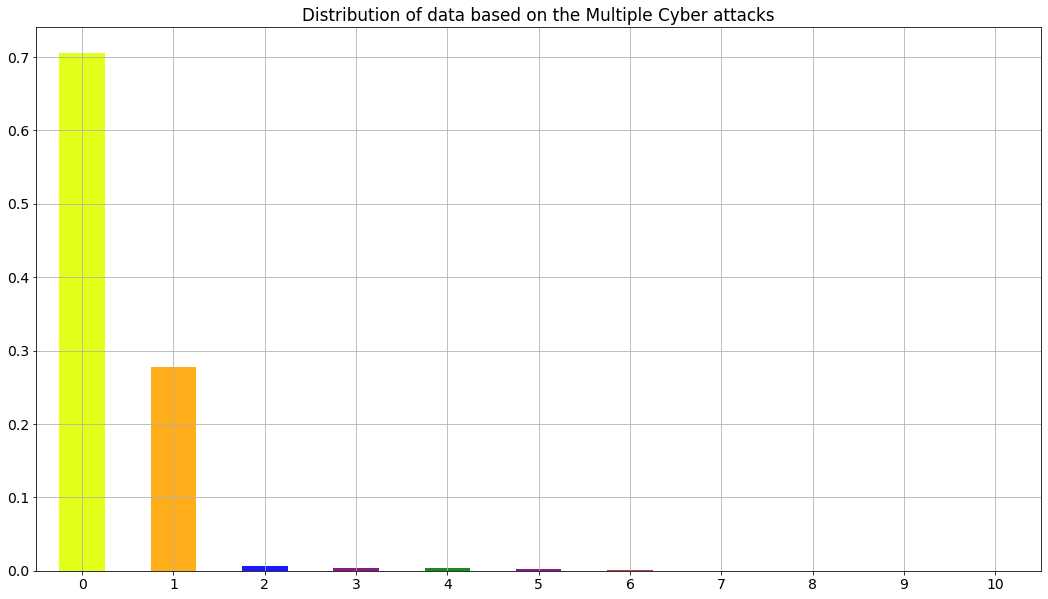

The data given for the multinomial classification based on different cyber attacks is highly unbalanced and we need to make a balanced data to work on it to get a better generalized model otherwise the majority of the attacks i.e. normal and neptune will have the greater impact on the accuracies and other evaluation metrics than other attacks which are present in minority. 


In [506]:
print(sample_multi.Multi_Attack.value_counts())
fig = plt.figure(figsize = (18,10))
sample_multi.Multi_Attack.value_counts(normalize = True).plot(kind='bar',color = ['#DFFF00','Orange', 'Blue', 'Purple','Green','Purple','Brown','#DFFF00','#40E0D0','#9FE2BF','Red'], alpha = 0.9, rot=0)
plt.title('Distribution of data based on the Multiple Cyber attacks')
plt.show()
print("The data given for the multinomial classification based on different cyber attacks is highly unbalanced and we need to make a balanced data to work on it to get a better generalized model otherwise the majority of the attacks i.e. normal and neptune will have the greater impact on the accuracies and other evaluation metrics than other attacks which are present in minority. ")

# SMOTE - Oversampling and Undersampling

In [507]:
count = y_train.value_counts()
count

8     827
7     817
2     817
3     805
1     802
4     801
5     801
10    797
6     780
9     777
0     776
Name: Multi_Attack, dtype: int64

In [508]:
n_samples = int(count.median())
n_samples

801

In [509]:
df_class0 = sample_multi[sample_multi.Multi_Attack == 0]
df_class1 = sample_multi[sample_multi.Multi_Attack == 1]
df_class2 = sample_multi[sample_multi.Multi_Attack == 2]
df_class3 = sample_multi[sample_multi.Multi_Attack == 3]
df_class4 = sample_multi[sample_multi.Multi_Attack == 4]
df_class5 = sample_multi[sample_multi.Multi_Attack == 5]
df_class6 = sample_multi[sample_multi.Multi_Attack == 6]
df_class7 = sample_multi[sample_multi.Multi_Attack == 7]
df_class8 = sample_multi[sample_multi.Multi_Attack == 8]
df_class9 = sample_multi[sample_multi.Multi_Attack == 9]
df_class10 = sample_multi[sample_multi.Multi_Attack == 10]

In [510]:
df_class0 = df_class0.sample(replace = False, n = 1000, random_state = 123)
df_class1 = df_class1.sample(replace = False, n = 1000, random_state = 123)
df_class2 = df_class2.sample(replace = False, n = 1000, random_state = 123)
df_class3 = df_class3.sample(replace = False, n = 1000, random_state = 123)
df_class4 = df_class4.sample(replace = False, n = 1000, random_state = 123)

In [511]:
df_class5 = df_class5.sample(replace = True, n = 1000, random_state = 123)
df_class6 = df_class6.sample(replace = True, n = 1000, random_state = 123)
df_class7 = df_class7.sample(replace = True, n = 1000, random_state = 123)
df_class8 = df_class8.sample(replace = True, n = 1000, random_state = 123)
df_class9 = df_class9.sample(replace = True, n = 1000, random_state = 123)
df_class10 = df_class10.sample(replace = True, n = 1000, random_state = 123)

In [512]:
sample_M = pd.concat([df_class0,df_class1,df_class2,df_class3,df_class4,df_class5,df_class6,df_class7,df_class8,df_class9,df_class10],axis = 0)

In [513]:
sample_M.Multi_Attack.value_counts()

0     1000
1     1000
2     1000
3     1000
4     1000
5     1000
6     1000
7     1000
8     1000
9     1000
10    1000
Name: Multi_Attack, dtype: int64

**Splitting of test and train data for multinomial Classification.**

In [514]:
features = []
for feature in sample_M.columns:
    if feature != 'Multi_Attack':
        features.append(feature)
X = sample_M[features]
y = sample_M['Multi_Attack']

In [515]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [516]:
count = y_train.value_counts()
count

8     827
7     817
2     817
3     805
1     802
4     801
5     801
10    797
6     780
9     777
0     776
Name: Multi_Attack, dtype: int64

8     827
7     817
2     817
3     805
1     802
4     801
5     801
10    797
6     780
9     777
0     776
Name: Multi_Attack, dtype: int64


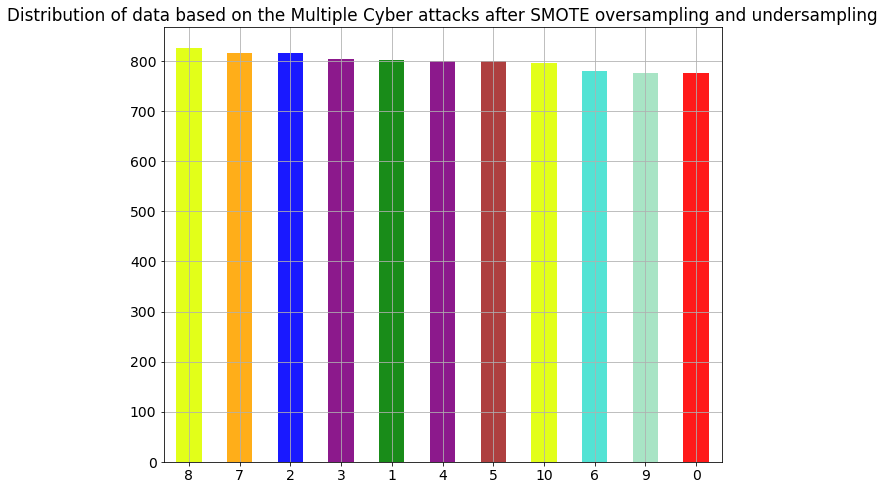

In [517]:
print(y_train.value_counts())
fig = plt.figure(figsize = (10,8))
y_train.value_counts().plot(kind='bar',color = ['#DFFF00','Orange', 'Blue', 'Purple','Green','Purple','Brown','#DFFF00','#40E0D0','#9FE2BF','Red'], alpha = 0.9, rot=0)
plt.title('Distribution of data based on the Multiple Cyber attacks after SMOTE oversampling and undersampling')
plt.show()

# Bivariate Relationship

In [518]:
sample_data_M = X_train.loc[:,Num_multi_var]
sample_data_M

,dst_host_srv_count,serror_rate,srv_count,dst_host_same_src_port_rate,hot,srv_diff_host_rate,count,num_shells,dst_host_serror_rate,dst_host_rerror_rate,num_file_creations,dst_host_srv_serror_rate,dst_bytes,srv_error_rate,dst_host_srv_diff_host_rate,num_failed_logins,dst_host_count,urgent,srv_rerror_rate,rerror_rate,num_compromised,num_access_files,num_root,duration,dst_host_srv_rerror_rate,dst_host_same_srv_rate,same_srv_rate,src_bytes,dst_host_diff_srv_rate,diff_srv_rate
0,0.001,0.0,0.001,0.100,0.2,0.000,0.001,0.0,0.000,0.000,0.1,0.0,0.00451,0.0,0.00,0.0,0.001,0.0,0.000,0.0,0.0,0.1,0.0,0.0026,0.000,0.100,0.100,0.00116,0.000,0.000
2096,0.002,0.0,0.002,0.100,0.0,0.000,0.002,0.0,0.000,0.100,0.0,0.0,0.00000,0.0,0.00,0.0,0.255,0.0,0.100,0.1,0.0,0.0,0.0,0.0379,0.100,0.001,0.100,0.00001,0.073,0.000
7,0.001,0.0,0.001,0.100,0.0,0.000,0.001,0.0,0.000,0.000,0.0,0.0,0.05690,0.0,0.00,0.0,0.001,0.0,0.000,0.0,0.0,0.0,0.0,0.0000,0.000,0.100,0.100,0.00000,0.000,0.000
7,0.005,0.0,0.001,0.100,0.0,0.000,0.001,0.0,0.000,0.000,0.0,0.0,0.00005,0.0,0.04,0.0,0.002,0.0,0.000,0.0,0.0,0.0,0.0,0.0000,0.000,0.100,0.100,0.00000,0.000,0.000
224380,0.017,0.0,0.017,0.000,0.0,0.000,0.245,0.0,0.000,0.100,0.0,0.0,0.00000,0.0,0.00,0.0,0.255,0.0,0.100,0.1,0.0,0.0,0.0,0.0000,0.100,0.007,0.007,0.00000,0.007,0.007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243316,0.255,0.0,0.017,0.000,0.0,0.000,0.017,0.0,0.000,0.000,0.0,0.0,0.01856,0.0,0.00,0.0,0.255,0.0,0.000,0.0,0.0,0.0,0.0,0.0000,0.000,0.100,0.100,0.00200,0.000,0.000
304163,0.250,0.0,0.005,0.000,0.0,0.000,0.005,0.0,0.000,0.000,0.0,0.0,0.02239,0.0,0.00,0.0,0.255,0.0,0.000,0.0,0.0,0.0,0.0,0.0000,0.000,0.098,0.100,0.00233,0.001,0.000
3,0.001,0.0,0.001,0.100,0.3,0.000,0.001,0.0,0.000,0.000,0.0,0.0,0.04551,0.0,0.00,0.0,0.001,0.0,0.000,0.0,0.1,0.0,0.0,0.0060,0.000,0.100,0.100,0.02328,0.000,0.000
115,0.116,0.0,0.006,0.001,0.2,0.033,0.005,0.0,0.000,0.004,0.0,0.0,0.08314,0.0,0.00,0.0,0.116,0.0,0.017,0.0,0.1,0.0,0.0,0.0000,0.004,0.100,0.100,0.54540,0.000,0.000


In [519]:
sample_data_M.head(5)

,dst_host_srv_count,serror_rate,srv_count,dst_host_same_src_port_rate,hot,srv_diff_host_rate,count,num_shells,dst_host_serror_rate,dst_host_rerror_rate,num_file_creations,dst_host_srv_serror_rate,dst_bytes,srv_error_rate,dst_host_srv_diff_host_rate,num_failed_logins,dst_host_count,urgent,srv_rerror_rate,rerror_rate,num_compromised,num_access_files,num_root,duration,dst_host_srv_rerror_rate,dst_host_same_srv_rate,same_srv_rate,src_bytes,dst_host_diff_srv_rate,diff_srv_rate
0,0.001,0.0,0.001,0.1,0.2,0.0,0.001,0.0,0.0,0.0,0.1,0.0,0.00451,0.0,0.00,0.0,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0026,0.0,0.100,0.100,0.00116,0.000,0.000
2096,0.002,0.0,0.002,0.1,0.0,0.0,0.002,0.0,0.0,0.1,0.0,0.0,0.00000,0.0,0.00,0.0,0.255,0.0,0.1,0.1,0.0,0.0,0.0,0.0379,0.1,0.001,0.100,0.00001,0.073,0.000
7,0.001,0.0,0.001,0.1,0.0,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.05690,0.0,0.00,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.100,0.100,0.00000,0.000,0.000
7,0.005,0.0,0.001,0.1,0.0,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.00005,0.0,0.04,0.0,0.002,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.100,0.100,0.00000,0.000,0.000
224380,0.017,0.0,0.017,0.0,0.0,0.0,0.245,0.0,0.0,0.1,0.0,0.0,0.00000,0.0,0.00,0.0,0.255,0.0,0.1,0.1,0.0,0.0,0.0,0.0000,0.1,0.007,0.007,0.00000,0.007,0.007


<AxesSubplot:>

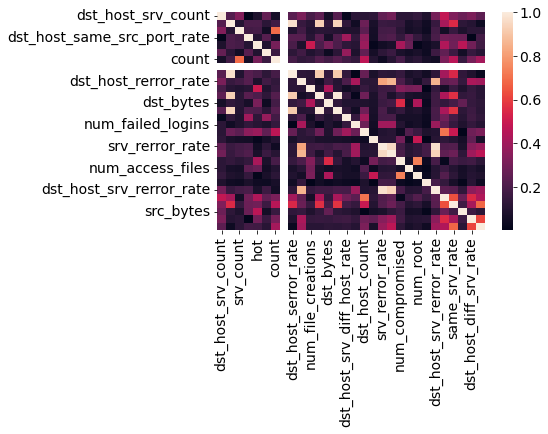

In [520]:
sns.heatmap(sample_data_M.corr().abs())

In [521]:
X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0026,0.0,0.07,0.00,0.00116,0.00451,0,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0,0.0,0.1,0.001,0.001,0.0,0.0,0.0,0.0,0.100,0.000,0.0,0.001,0.001,0.100,0.000,0.1,0.00,0.0,0.0,0.0,0.0
2096,0.0379,0.0,0.10,0.08,0.00001,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.002,0.002,0.0,0.0,0.1,0.1,0.100,0.000,0.0,0.255,0.002,0.001,0.073,0.1,0.00,0.0,0.0,0.1,0.1
7,0.0000,0.0,0.14,0.00,0.00000,0.05690,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.100,0.000,0.0,0.001,0.001,0.100,0.000,0.1,0.00,0.0,0.0,0.0,0.0
7,0.0000,0.0,0.14,0.00,0.00000,0.00005,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.100,0.000,0.0,0.002,0.005,0.100,0.000,0.1,0.04,0.0,0.0,0.0,0.0
224380,0.0000,0.0,0.16,0.06,0.00000,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.245,0.017,0.0,0.0,0.1,0.1,0.007,0.007,0.0,0.255,0.017,0.007,0.007,0.0,0.00,0.0,0.0,0.1,0.1


In [522]:
y_train

0         10
2096       4
7          8
7         10
224380     1
          ..
243316     0
304163     0
3          8
115        6
157        5
Name: Multi_Attack, Length: 8800, dtype: int64

In [523]:
Bivariate_relationship = pd.DataFrame(X_train.corrwith(y_train).abs().sort_values(ascending = False))
Bivariate_relationship

,0
dst_host_count,0.519333
same_srv_rate,0.501225
hot,0.455967
count,0.434696
dst_host_srv_count,0.386871
dst_host_serror_rate,0.358283
srv_error_rate,0.353389
serror_rate,0.351384
num_compromised,0.349183
num_file_creations,0.346257


In [524]:
imp_vars_BR = Bivariate_relationship.sort_values(by = 0,ascending = False).reset_index()
imp_vars_BR

,index,0
0,dst_host_count,0.519333
1,same_srv_rate,0.501225
2,hot,0.455967
3,count,0.434696
4,dst_host_srv_count,0.386871
5,dst_host_serror_rate,0.358283
6,srv_error_rate,0.353389
7,serror_rate,0.351384
8,num_compromised,0.349183
9,num_file_creations,0.346257


In [525]:
imp_vars_Bivariate = imp_vars_BR['index'].values.tolist()
imp_vars_Bivariate

['dst_host_count',
 'same_srv_rate',
 'hot',
 'count',
 'dst_host_srv_count',
 'dst_host_serror_rate',
 'srv_error_rate',
 'serror_rate',
 'num_compromised',
 'num_file_creations',
 'logged_in',
 'dst_host_srv_serror_rate',
 'root_shell',
 'dst_host_same_srv_rate',
 'flag',
 'dst_host_same_src_port_rate',
 'num_root',
 'is_guest_login',
 'num_access_files',
 'urgent',
 'diff_srv_rate',
 'dst_host_srv_diff_host_rate',
 'protocol_type',
 'srv_count',
 'dst_bytes',
 'dst_host_diff_srv_rate',
 'num_failed_logins',
 'src_bytes',
 'rerror_rate',
 'srv_rerror_rate',
 'dst_host_srv_rerror_rate',
 'srv_diff_host_rate',
 'dst_host_rerror_rate',
 'wrong_fragment',
 'duration',
 'service',
 'land',
 'su_attempted',
 'num_shells',
 'num_outbound_cmds',
 'is_host_login']

# SELECT K BEST Feature Elimination:

In [526]:
SKB = SelectKBest(f_classif, k=15).fit(X_train, y_train)

In [527]:
SKB.get_support()

array([False,  True, False,  True,  True, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False,  True,
        True,  True, False, False,  True,  True,  True, False, False,
       False,  True, False, False,  True])

In [528]:
imp_vars_kbest = X_train.columns[SKB.get_support()]
imp_vars_kbest

Index(['protocol_type', 'flag', 'src_bytes', 'num_failed_logins', 'logged_in',
       'srv_count', 'serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_serror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

# Final features Selection to build a Model:

In [529]:
final_vars_multi = set(imp_vars_Bivariate).intersection(set(imp_vars_kbest))
final_vars_multi

{'dst_host_count',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_rerror_rate',
 'flag',
 'logged_in',
 'num_failed_logins',
 'protocol_type',
 'rerror_rate',
 'same_srv_rate',
 'serror_rate',
 'src_bytes',
 'srv_count',
 'srv_rerror_rate'}

In [530]:
X_train = X_train[['dst_host_count','dst_host_rerror_rate','dst_host_same_srv_rate','dst_host_serror_rate','dst_host_srv_count','dst_host_srv_rerror_rate','flag','logged_in','num_failed_logins','protocol_type','rerror_rate','same_srv_rate','src_bytes','srv_count','srv_rerror_rate']]

In [531]:
X_train.head(5)

,dst_host_count,dst_host_rerror_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,dst_host_srv_rerror_rate,flag,logged_in,num_failed_logins,protocol_type,rerror_rate,same_srv_rate,src_bytes,srv_count,srv_rerror_rate
0,0.001,0.0,0.100,0.0,0.001,0.0,0.00,0.1,0.0,0.0,0.0,0.100,0.00116,0.001,0.0
2096,0.255,0.1,0.001,0.0,0.002,0.1,0.08,0.0,0.0,0.0,0.1,0.100,0.00001,0.002,0.1
7,0.001,0.0,0.100,0.0,0.001,0.0,0.00,0.1,0.0,0.0,0.0,0.100,0.00000,0.001,0.0
7,0.002,0.0,0.100,0.0,0.005,0.0,0.00,0.0,0.0,0.0,0.0,0.100,0.00000,0.001,0.0
224380,0.255,0.1,0.007,0.0,0.017,0.1,0.06,0.0,0.0,0.0,0.1,0.007,0.00000,0.017,0.1


# Running the Variable Inflation Factor tests to check the Collinearity.

**Checking the collinearity between the independent variables and we will be using the Forward selection/Backward elimination method to select the features as it is much more intuitive to get the model with a more general behaviour.**
**We want as least as possible the number of variables which are truly explaining the Interest rate.**
***Backward Elimination Technique:***
***Eliminating the variables level-wise based on Variable Inflation Factor scores and checking the VIF values at each level.***

In [532]:
X_train_multi = pd.Series(variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns)))

In [533]:
vif_data_multi = pd.concat([pd.Series(X_train.columns),X_train_multi], axis = 1)

In [534]:
vif_data_multi.columns = ['features','VIF']

In [535]:
vif_data_multi.sort_values(by = 'VIF', ascending = False)

,features,VIF
14,srv_rerror_rate,39.584127
5,dst_host_srv_rerror_rate,31.436386
10,rerror_rate,27.592307
6,flag,15.399805
2,dst_host_same_srv_rate,12.002520
11,same_srv_rate,11.745461
1,dst_host_rerror_rate,7.382151
3,dst_host_serror_rate,7.166091
0,dst_host_count,6.147075
7,logged_in,5.919279


In [536]:
X_train = X_train.drop(columns = ['srv_rerror_rate','dst_host_srv_rerror_rate','rerror_rate'])

In [537]:
vif_data_multi = pd.concat([pd.Series(X2.columns),X_new], axis = 1)

In [538]:
X_train_multi = pd.Series(variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns)))

In [539]:
vif_data_multi = pd.concat([pd.Series(X_train.columns),X_train_multi], axis = 1)

In [540]:
vif_data_multi.columns = ['features','VIF']

In [541]:
vif_data_multi.sort_values(by = 'VIF', ascending = False)

,features,VIF
2,dst_host_same_srv_rate,10.959049
9,same_srv_rate,10.955116
5,flag,6.852868
0,dst_host_count,5.836153
6,logged_in,5.765356
8,protocol_type,4.543231
1,dst_host_rerror_rate,4.431493
3,dst_host_serror_rate,3.618764
4,dst_host_srv_count,3.518826
11,srv_count,2.199449


In [542]:
X_train = X_train.drop(columns = ['dst_host_same_srv_rate','same_srv_rate'])

In [547]:
X_train = X_train.drop(columns = ['flag'])

In [548]:
X_train_multi = pd.Series(variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns)))

In [549]:
vif_data_multi = pd.concat([pd.Series(X_train.columns),X_train_multi], axis = 1)

In [550]:
vif_data_multi.columns = ['features','VIF']

In [551]:
vif_data_multi.sort_values(by = 'VIF', ascending = False)

,features,VIF
0,dst_host_count,3.373912
6,protocol_type,2.572733
3,dst_host_srv_count,2.407870
1,dst_host_rerror_rate,2.215746
8,srv_count,2.192001
4,logged_in,1.733328
2,dst_host_serror_rate,1.564579
5,num_failed_logins,1.554381
7,src_bytes,1.415770


# Training the model using KNN Algorithm:

In [555]:
X_train = X_train[['dst_host_count','protocol_type','dst_host_srv_count','dst_host_rerror_rate','srv_count','logged_in','dst_host_serror_rate','num_failed_logins','src_bytes']]

In [556]:
knn_model = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform') 

In [557]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [558]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [559]:
predict_train = knn_model.predict(X_train)

In [560]:
predict_train

array([10,  4,  8, ...,  8,  6,  5], dtype=int64)

In [561]:
train_prob = pd.DataFrame(knn_model.predict_proba(X_train))

In [562]:
train_prob

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8795,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8796,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8798,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# CONFUSION MATRIX

In [564]:
pd.crosstab(y_train,predict_train, margins = True)

col_0,0,1,2,3,4,5,6,7,8,9,10,All
Multi_Attack,,,,,,,,,,,,
0,741,0,4,8,3,10,0,0,4,5,1,776
1,0,783,0,0,15,4,0,0,0,0,0,802
2,2,0,770,0,42,0,0,0,1,2,0,817
3,0,0,2,802,1,0,0,0,0,0,0,805
4,2,0,12,0,786,1,0,0,0,0,0,801
5,0,11,0,0,0,790,0,0,0,0,0,801
6,0,0,0,0,0,0,780,0,0,0,0,780
7,0,0,0,0,0,0,0,817,0,0,0,817
8,0,0,0,0,0,0,0,0,827,0,0,827


In [565]:
#Classification Report
print(metrics.classification_report(y_train,predict_train))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       776
           1       0.99      0.98      0.98       802
           2       0.98      0.94      0.96       817
           3       0.99      1.00      0.99       805
           4       0.93      0.98      0.95       801
           5       0.98      0.99      0.98       801
           6       1.00      1.00      1.00       780
           7       1.00      1.00      1.00       817
           8       0.99      1.00      1.00       827
           9       0.99      1.00      1.00       777
          10       1.00      1.00      1.00       797

    accuracy                           0.99      8800
   macro avg       0.99      0.99      0.99      8800
weighted avg       0.99      0.99      0.99      8800



# Validate the model on the Testing Data:

In [569]:
X_test = X_test[['dst_host_count','protocol_type','dst_host_srv_count','dst_host_rerror_rate','srv_count','logged_in','dst_host_serror_rate','num_failed_logins','src_bytes']]

In [570]:
predict_test = knn_model.predict(X_test)

In [571]:
#Confusion matrix
pd.crosstab(y_test,predict_test)

col_0,0,1,2,3,4,5,6,7,8,9,10
Multi_Attack,,,,,,,,,,,
0,210,0,1,2,0,6,1,0,1,2,1
1,0,195,0,0,3,0,0,0,0,0,0
2,1,0,162,0,19,1,0,0,0,0,0
3,0,0,0,194,1,0,0,0,0,0,0
4,1,0,8,0,187,1,0,0,0,2,0
5,0,9,0,0,0,190,0,0,0,0,0
6,0,0,0,0,0,0,220,0,0,0,0
7,0,0,0,0,0,0,0,183,0,0,0
8,0,0,0,0,0,0,0,0,173,0,0


In [572]:
print(metrics.classification_report(y_test,predict_test))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       224
           1       0.96      0.98      0.97       198
           2       0.95      0.89      0.92       183
           3       0.99      0.99      0.99       195
           4       0.89      0.94      0.91       199
           5       0.96      0.95      0.96       199
           6       1.00      1.00      1.00       220
           7       1.00      1.00      1.00       183
           8       0.99      1.00      1.00       173
           9       0.98      1.00      0.99       223
          10       1.00      1.00      1.00       203

    accuracy                           0.97      2200
   macro avg       0.97      0.97      0.97      2200
weighted avg       0.97      0.97      0.97      2200



In [ ]:
# Training accuracy is 99% and Testing accuracy is 97%, a little less may be because of more number of features used, less number of observations or the slight collinearity between the selected final variables.
# To overcome this, we can try out the Cross Validation using the GridSearchCV.

In [574]:
grid = {'n_neighbors':[3,5,7,9,11], 'weights':['uniform','distance']}
knn_model_cv = GridSearchCV(KNeighborsClassifier(), param_grid = grid, cv = 5, scoring = 'roc_auc', verbose = True)
knn_model_cv = knn_model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [578]:
knn_model_cv.best_params_
print('We already build our model on the best parameters, so we got best accuracies through KNN algorithms.')

We already build our model on the best parameters, so we got best accuracies through KNN algorithms.


In [577]:
knn_model_cv.cv_results_

{'mean_fit_time': array([0.04133296, 0.02938008, 0.02938004, 0.02938914, 0.02924986,
        0.03037968, 0.03077927, 0.0291811 , 0.02898102, 0.02907739]),
 'std_fit_time': array([1.77304749e-02, 4.89784675e-04, 4.89823678e-04, 4.89920420e-04,
        3.91689652e-04, 1.85340678e-03, 1.16587733e-03, 4.00257111e-04,
        1.78416128e-07, 1.87393521e-04]),
 'mean_score_time': array([0.03022714, 0.00060024, 0.00080066, 0.00060024, 0.00080037,
        0.00099974, 0.00060034, 0.00060024, 0.00080028, 0.00079975]),
 'std_score_time': array([6.04542732e-02, 4.90096043e-04, 4.00329272e-04, 4.90096205e-04,
        4.00186334e-04, 7.44843452e-07, 4.90174289e-04, 4.90096112e-04,
        4.00137940e-04, 3.99876067e-04]),
 'param_n_neighbors': masked_array(data=[3, 3, 5, 5, 7, 7, 9, 9, 11, 11],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_weights': masked_array(data=['uniform

In [579]:
print(metrics.classification_report(y_train,predict_train))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       776
           1       0.99      0.98      0.98       802
           2       0.98      0.94      0.96       817
           3       0.99      1.00      0.99       805
           4       0.93      0.98      0.95       801
           5       0.98      0.99      0.98       801
           6       1.00      1.00      1.00       780
           7       1.00      1.00      1.00       817
           8       0.99      1.00      1.00       827
           9       0.99      1.00      1.00       777
          10       1.00      1.00      1.00       797

    accuracy                           0.99      8800
   macro avg       0.99      0.99      0.99      8800
weighted avg       0.99      0.99      0.99      8800



In [580]:
print(metrics.classification_report(y_test,predict_test))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       224
           1       0.96      0.98      0.97       198
           2       0.95      0.89      0.92       183
           3       0.99      0.99      0.99       195
           4       0.89      0.94      0.91       199
           5       0.96      0.95      0.96       199
           6       1.00      1.00      1.00       220
           7       1.00      1.00      1.00       183
           8       0.99      1.00      1.00       173
           9       0.98      1.00      0.99       223
          10       1.00      1.00      1.00       203

    accuracy                           0.97      2200
   macro avg       0.97      0.97      0.97      2200
weighted avg       0.97      0.97      0.97      2200

